In [4]:
#Script to perform the analysis and graphing of slot WG effect on hybrid ring resonator sensitivity
#Written by Jared Rybarczyk for EE 699-003

#import libraries
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cbook as cbook

#Define constants, all lengths in microns
Lambda = 1.550
Lambda_Res = 1.5505
L_Ring = 182
L_Strip = 28
L_Slot = 1
R = 20
Strip_ng = 4.176
Slot_ng = 3.003
Strip_sens = 0.14
Slot_sens = 0.89

In [5]:
#Define functions for easy calculation

def GroupIndex(R, L_Ring, L_Strip, L_Slot, Strip_ng, Slot_ng):
    GroupInd = ((((2*np.pi*R) + (2*L_Strip) - L_Slot)/L_Ring)*Strip_ng) + ((L_Slot/L_Ring)*Slot_ng)
    return GroupInd

def FSR(Lambda, L_Ring, GroupInd):
    FreeSpec = (Lambda**2)/(L_Ring*GroupInd)
    return FreeSpec

def SRR(R, L_Ring, L_Strip, L_Slot, Strip_sens, Slot_sens, GroupInd, Lambda_Res):
    Ring_sens = (((2*np.pi*R) + (2*L_Strip) - L_Slot)/L_Ring)*Strip_sens
    Ring_sens = Ring_sens + ((L_Slot/L_Ring)*Slot_sens)
    Ring_sens = (Ring_sens/GroupInd) * Lambda_Res
    return Ring_sens

def Q_L(FreeSpec, Lambda_Res):
    r = 0.671 #holding both r and a constant
    a = 0.69 #in reality a would vary with the changing slot WG 
    Q_loaded = np.pi * np.sqrt(r*a) * Lambda_Res
    Q_loaded = Q_loaded / ((1-r*a)*(FreeSpec))
    return Q_loaded
   
def FOM(Ring_sens, Q_loaded, Lambda_Res):
    Fig_Merit = (Ring_sens/Lambda_Res)*Q_loaded
    return Fig_Merit


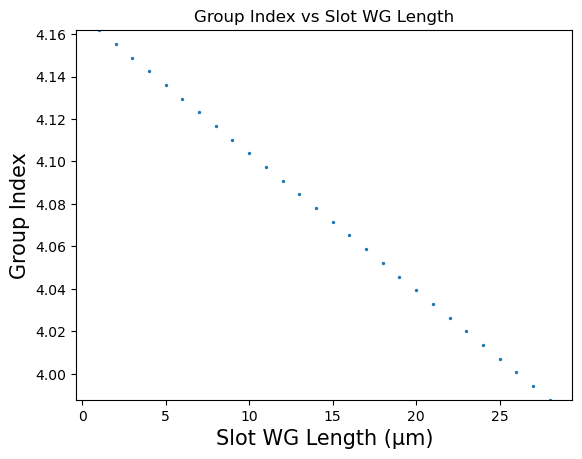

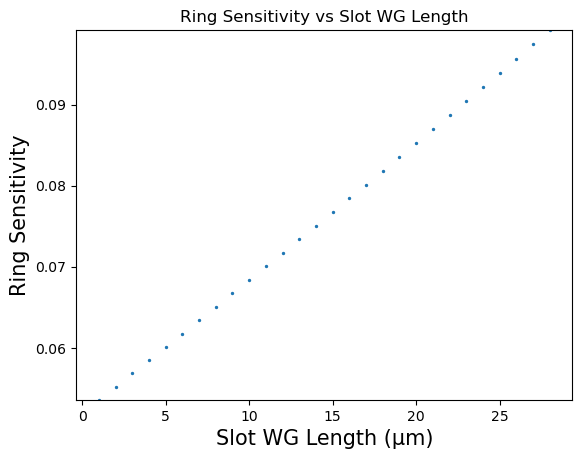

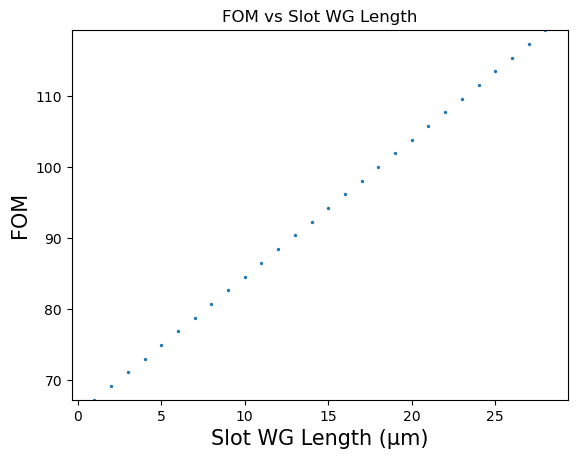

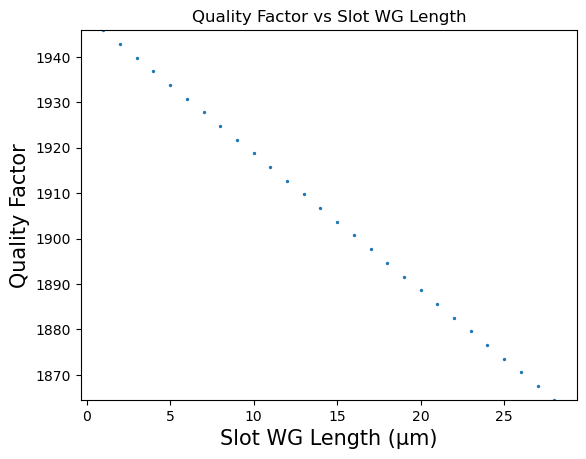

Text(0, 0.5, 'FSR (µm)')

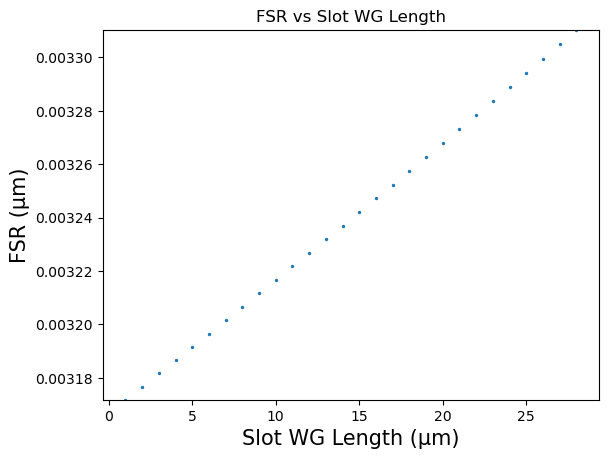

In [6]:
#Run a for-loop and store results in an array
NG_array = np.zeros(28)
FSR_array = np.zeros(28)
SRR_array = np.zeros(28)
QL_array = np.zeros(28)
FOM_array = np.zeros(28)
loopindex = 0

while L_Slot < 29:
    Group_Index = GroupIndex(R, L_Ring, L_Strip, L_Slot, Strip_ng, Slot_ng)
    FreeSpectralRange = FSR(Lambda, L_Ring, Group_Index)
    SRR_ = SRR(R, L_Ring, L_Strip, L_Slot, Strip_sens, Slot_sens, Group_Index, Lambda_Res)
    QL_ = Q_L(FreeSpectralRange, Lambda_Res)
    FOM_ = FOM(SRR_, QL_, Lambda_Res)
    
    NG_array[loopindex] = Group_Index
    FSR_array[loopindex] = FreeSpectralRange
    SRR_array[loopindex] = SRR_
    QL_array[loopindex] = QL_
    FOM_array[loopindex] = FOM_
    
    L_Slot = L_Slot + 1
    loopindex = loopindex + 1
    
#Plot results

fig, ax = plt.subplots()

plt.scatter(np.arange(1,29,1), NG_array, s=2)
plt.title('Group Index vs Slot WG Length')
plt.ylim(min(NG_array), max(NG_array))
ax.set_xlabel(r'Slot WG Length (µm)', fontsize=15)
ax.set_ylabel(r'Group Index', fontsize=15)

plt.show()

fig, ax = plt.subplots()
plt.scatter(np.arange(1,29,1), SRR_array, s=2)
plt.title('Ring Sensitivity vs Slot WG Length')
plt.ylim(min(SRR_array), max(SRR_array))
ax.set_xlabel(r'Slot WG Length (µm)', fontsize=15)
ax.set_ylabel(r'Ring Sensitivity', fontsize=15)

plt.show()

fig, ax = plt.subplots()
plt.scatter(np.arange(1,29,1), FOM_array, s=2)
plt.title('FOM vs Slot WG Length')
plt.ylim(min(FOM_array), max(FOM_array))
ax.set_xlabel(r'Slot WG Length (µm)', fontsize=15)
ax.set_ylabel(r'FOM', fontsize=15)

plt.show()

fig, ax = plt.subplots()
plt.scatter(np.arange(1,29,1), QL_array, s=2)
plt.title('Quality Factor vs Slot WG Length')
plt.ylim(min(QL_array), max(QL_array))
ax.set_xlabel(r'Slot WG Length (µm)', fontsize=15)
ax.set_ylabel(r'Quality Factor', fontsize=15)

plt.show()

fig, ax = plt.subplots()
plt.scatter(np.arange(1,29,1), FSR_array, s=2)
plt.title('FSR vs Slot WG Length')
plt.ylim(min(FSR_array), max(FSR_array))
ax.set_xlabel(r'Slot WG Length (µm)', fontsize=15)
ax.set_ylabel(r'FSR (µm)', fontsize=15)
    